In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

# Efecto fotoeléctrico.

In [3]:
def Minimos_cuadrados(x,y,n=1):
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

def GetError(x,y,p,n=1):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot(R.T,R)/(len(y)-len(p))
    
    Cov = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    R2 = None
    if np.shape(Cov) == (2,2):
        R2 = (Cov[0][1]**2)/(Cov[0][0]*Cov[1][1])

    return (Cov,R2,R)

def Get_sigma(Cov):
    sigmaai = np.sqrt(np.diagonal(Cov))
    return sigmaai[::-1]

def Error_porcentual(X_real,X_exp):
    return (np.abs(X_exp - X_real)/X_real)

def presicion(d,v):
    p = (d/v)
    if p <= 0.1:
        return p,True
    else:
        return p,False
    
def exactitud(xr,xm,d):
    e = (np.abs(xr-xm))
    if e <= (2.5*d):
        return e,True
    else:
        return e,False

X = sym.Symbol('x',real=True)
Y = sym.Symbol('y',real=True)

# Datos.

In [4]:
intensidades = np.array([10, 9.5, 9, 8.5, 8, 7.5, 7, 6.5, 6, 5.5, 5, 4.5, 4, 3.5, 3, 2.5, 2, 1.5, 1, 0.5])

voltajes_rojo = np.array([80, 93, 103, 113, 122, 131, 140, 149, 157, 166, 176, 185, 195, 205, 217, 228, 242, 263, 289, 321])
voltajes_amarillo = np.array([312, 320, 326, 329, 336, 344, 349, 356, 362, 370, 378, 385, 397, 406, 416, 430, 445, 463, 482, 521])
voltajes_verde = np.array([689, 692, 694, 695, 697, 699, 701, 702, 704, 705, 707, 709, 711, 713, 715, 717, 719, 721, 723, 725])
voltajes_azul = np.array([861, 862, 863, 865, 866, 868, 868, 870, 870, 871, 872, 872, 873, 874, 874, 875, 876, 877, 878, 879])
voltajes_rojo_x9 = np.array([324, 328, 337, 342, 343, 348, 351, 354, 357, 361, 364, 368, 373, 377, 382, 386, 391, 397, 402, 410])

In [5]:
error_x = 0.25

In [6]:
Vf = []
dvf = []

# Análisis.

Rojo

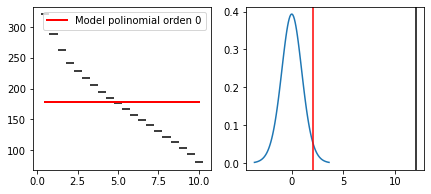

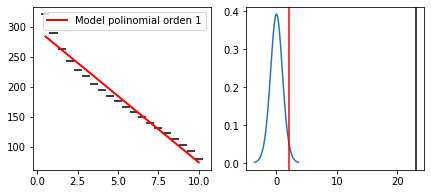

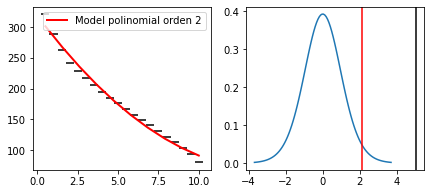

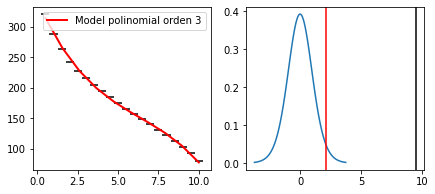

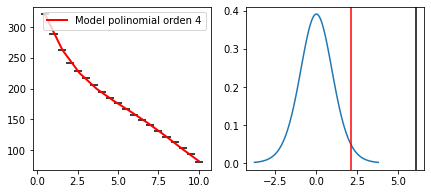

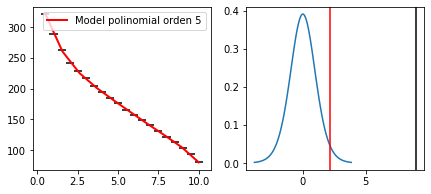

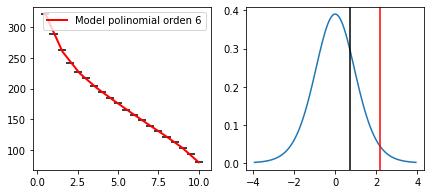

In [7]:
# Miramos cual es el mejor modelo:

for n in range(7):
    
    param = Minimos_cuadrados(intensidades,voltajes_rojo,n)
    Cov,R2,r = GetError(intensidades,voltajes_rojo,param,n)
    
    _x = np.linspace(np.min(intensidades),np.max(intensidades),10)
    _y = GetModel(_x,param)
    
    ai = param[-1]
    sigmaai = np.sqrt(Cov[-1,-1])
    
    tobs = np.abs(0. - ai)/sigmaai
    
    df = len(intensidades) - len(param) - 1
    #print(df)
    
    tcritico = t.ppf(0.975,df=df)
    tcritico

    #print(ai,sigmaai,tobs,tcritico)
    
    fig = plt.figure(figsize=(7,3))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    
    ax.errorbar(intensidades,voltajes_rojo, xerr= error_x, fmt='none', ecolor='black')
    ax.plot(_x,_y,color='r',lw=2,label='Model polinomial orden {}'.format(n))
    ax.legend()
    
    _t = np.linspace(t.ppf(0.001,df=df),t.ppf(0.999,df=df),100)
    ax1.plot(_t,t.pdf(_t,df=df))
    ax1.axvline(x=tobs,color='k')
    ax1.axvline(x=tcritico,color='r')

In [8]:
# El mejor modelo es el polinomio de grado 5
n=5
param = Minimos_cuadrados(intensidades,voltajes_rojo,n)
param

array([ 3.65250155e+02, -1.00662225e+02,  2.78156791e+01, -4.68500989e+00,
        3.91198946e-01, -1.28724368e-02])

In [9]:
param_ = param[::-1]
param_

array([-1.28724368e-02,  3.91198946e-01, -4.68500989e+00,  2.78156791e+01,
       -1.00662225e+02,  3.65250155e+02])

In [10]:
Cov,R2,r = GetError(intensidades,voltajes_rojo,param,n)

In [11]:
deltas = Get_sigma(Cov)
deltas

array([1.43154781e-03, 3.77391698e-02, 3.63047989e-01, 1.54638827e+00,
       2.78407918e+00, 1.58685098e+00])

In [12]:
# Voltaje de frenado:
Vf_rojo = param_[-1]*1e-03
Vf.append(Vf_rojo)
Vf_rojo

0.36525015479853395

In [13]:
#Incertidumbre del voltaje de frenado:
dvf_rojo = deltas[-1]*1e-03
dvf.append(dvf_rojo)
dvf_rojo

0.0015868509765164616

In [14]:
_x_rojo = np.linspace(0.,np.max(intensidades),50)
_y_rojo = GetModel(_x_rojo,param)

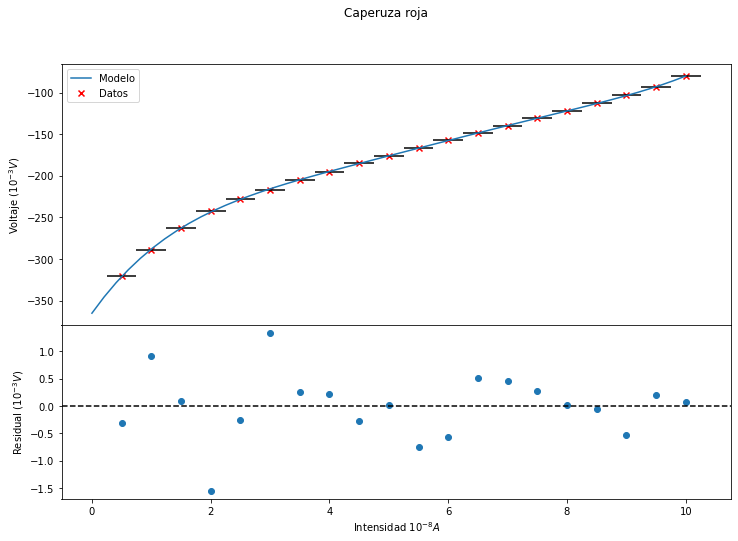

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)

fig.suptitle('Caperuza roja')
axs[0].scatter(intensidades,(-1)*voltajes_rojo,label='Datos',color='r',marker='x')
axs[0].errorbar(intensidades,(-1)*voltajes_rojo, xerr= error_x, fmt='none', ecolor='black')
axs[0].plot(_x_rojo,(-1)*_y_rojo,label='Modelo')
axs[0].set_ylabel('Voltaje ($10^{-3}V$)')
axs[0].legend()

axs[1].scatter(intensidades,r)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('Intensidad $10^{-8}A$')
axs[1].set_ylabel('Residual ($10^{-3}V$)')
#axs[1].set_ylim(-1.7,1.7)
#axs[1].set_yticks(np.arange(-1.5, 2., 0.5))
plt.show()

Amarillo

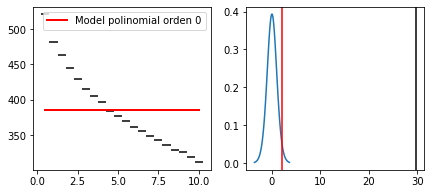

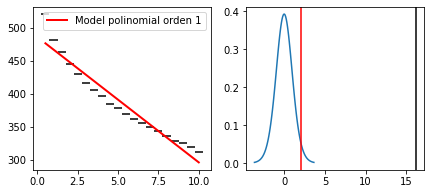

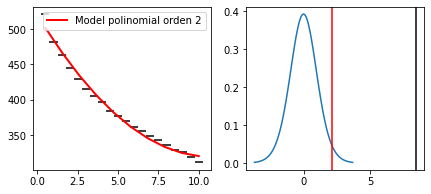

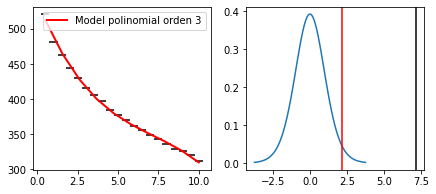

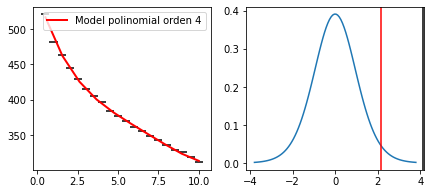

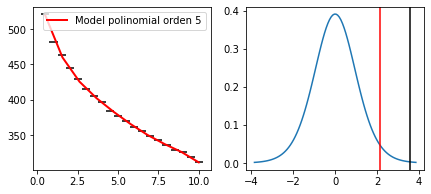

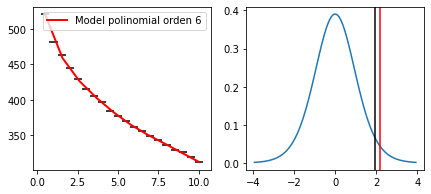

In [16]:
for n in range(7):
    
    param = Minimos_cuadrados(intensidades,voltajes_amarillo,n)
    Cov,R2,r = GetError(intensidades,voltajes_amarillo,param,n)
    #print(param)
    _x = np.linspace(np.min(intensidades),np.max(intensidades),10)
    _y = GetModel(_x,param)
    
    ai = param[-1]
    sigmaai = np.sqrt(Cov[-1,-1])
    
    tobs = np.abs(0. - ai)/sigmaai
    
    df = len(intensidades) - len(param) - 1
    #print(df)
    
    tcritico = t.ppf(0.975,df=df)
    tcritico

    #print(ai,sigmaai,tobs,tcritico)
    
    fig = plt.figure(figsize=(7,3))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    
    ax.errorbar(intensidades,voltajes_amarillo, xerr= error_x, fmt='none', ecolor='black')
    ax.plot(_x,_y,color='r',lw=2,label='Model polinomial orden {}'.format(n))
    ax.legend()
    
    _t = np.linspace(t.ppf(0.001,df=df),t.ppf(0.999,df=df),100)
    ax1.plot(_t,t.pdf(_t,df=df))
    ax1.axvline(x=tobs,color='k')
    ax1.axvline(x=tcritico,color='r')

In [17]:
# El mejor modelo es el polinomio de grado 5
n=5
param = Minimos_cuadrados(intensidades,voltajes_amarillo,n)
param

array([ 5.61148091e+02, -9.71276412e+01,  2.68684445e+01, -4.59049222e+00,
        3.93908393e-01, -1.31341141e-02])

In [18]:
param_ = param[::-1]
param_

array([-1.31341141e-02,  3.93908393e-01, -4.59049222e+00,  2.68684445e+01,
       -9.71276412e+01,  5.61148091e+02])

In [19]:
Cov,R2,r = GetError(intensidades,voltajes_amarillo,param,n)

In [20]:
deltas = Get_sigma(Cov)
deltas

array([3.69246871e-03, 9.73426822e-02, 9.36429319e-01, 3.98868293e+00,
       7.18112604e+00, 4.09305057e+00])

In [21]:
# Voltaje de frenado:
Vf_amarillo = param_[-1]*1e-03
Vf.append(Vf_amarillo)
Vf_amarillo

0.5611480908150788

In [22]:
#Incertidumbre del voltaje de frenado:
dvf_amarillo = deltas[-1]*1e-03
dvf.append(dvf_amarillo)
dvf_amarillo

0.004093050566186594

In [23]:
_x_amarillo = np.linspace(0.,np.max(intensidades),50)
_y_amarillo = GetModel(_x_amarillo,param)

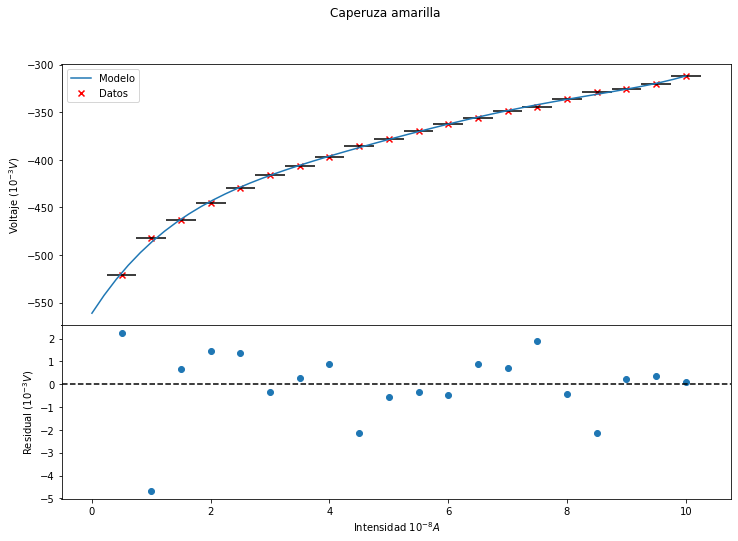

In [24]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)

fig.suptitle('Caperuza amarilla')
axs[0].scatter(intensidades,(-1)*voltajes_amarillo,label='Datos',color='r',marker='x')
axs[0].errorbar(intensidades,(-1)*voltajes_amarillo, xerr= error_x, fmt='none', ecolor='black')
axs[0].plot(_x_amarillo,(-1)*_y_amarillo,label='Modelo')
axs[0].set_ylabel('Voltaje ($10^{-3}V$)')
axs[0].legend()

axs[1].scatter(intensidades,r)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('Intensidad $10^{-8}A$')
axs[1].set_ylabel('Residual ($10^{-3}V$)')
#axs[1].set_ylim(-1.7,1.7)
#axs[1].set_yticks(np.arange(-1.5, 2., 0.5))
plt.show()

Verde

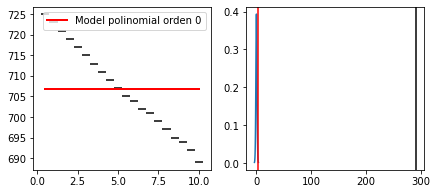

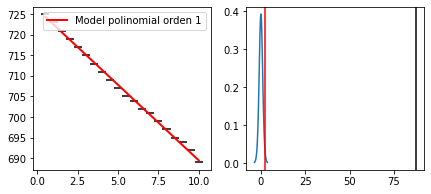

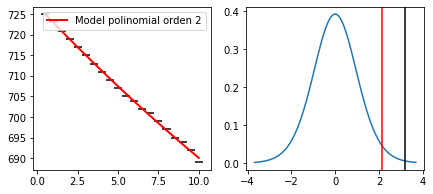

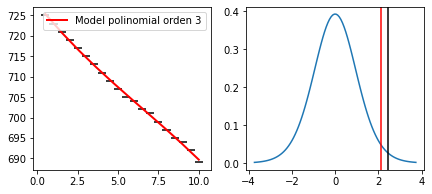

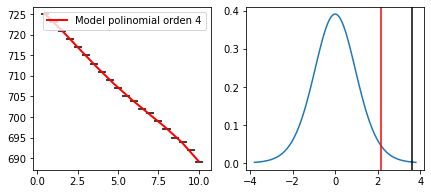

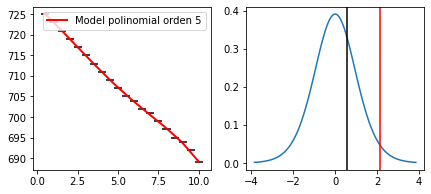

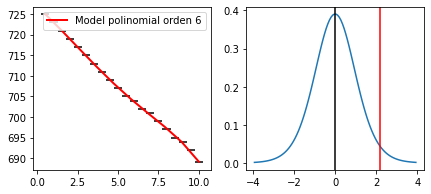

In [25]:
for n in range(7):
    
    param = Minimos_cuadrados(intensidades,voltajes_verde,n)
    Cov,R2,r = GetError(intensidades,voltajes_verde,param,n)
    #print(param)
    _x = np.linspace(np.min(intensidades),np.max(intensidades),10)
    _y = GetModel(_x,param)
    
    ai = param[-1]
    sigmaai = np.sqrt(Cov[-1,-1])
    
    tobs = np.abs(0. - ai)/sigmaai
    
    df = len(intensidades) - len(param) - 1
    #print(df)
    
    tcritico = t.ppf(0.975,df=df)
    tcritico

    #print(ai,sigmaai,tobs,tcritico)
    
    fig = plt.figure(figsize=(7,3))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    
    ax.errorbar(intensidades,voltajes_verde, xerr= error_x, fmt='none', ecolor='black')
    ax.plot(_x,_y,color='r',lw=2,label='Model polinomial orden {}'.format(n))
    ax.legend()
    
    _t = np.linspace(t.ppf(0.001,df=df),t.ppf(0.999,df=df),100)
    ax1.plot(_t,t.pdf(_t,df=df))
    ax1.axvline(x=tobs,color='k')
    ax1.axvline(x=tcritico,color='r')

In [26]:
# El mejor modelo es el polinomio de grado 4
n=4
param = Minimos_cuadrados(intensidades,voltajes_verde,n)
param

array([ 7.26548117e+02, -3.04951396e+00, -5.20540154e-01,  9.67560244e-02,
       -5.15078093e-03])

In [27]:
param_ = param[::-1]
param_

array([-5.15078093e-03,  9.67560244e-02, -5.20540154e-01, -3.04951396e+00,
        7.26548117e+02])

In [28]:
Cov,R2,r = GetError(intensidades,voltajes_verde,param,n)

In [29]:
deltas = Get_sigma(Cov)
deltas

array([0.00142986, 0.0302339 , 0.21370466, 0.57084965, 0.45664642])

In [30]:
# Voltaje de frenado:
Vf_verde = param_[-1]*1e-03
Vf.append(Vf_verde)
Vf_verde

0.7265481166151204

In [31]:
#Incertidumbre del voltaje de frenado:
dvf_verde = deltas[-1]*1e-03
dvf.append(dvf_verde)
dvf_verde

0.00045664641595690765

In [32]:
_x_verde = np.linspace(0.,np.max(intensidades),50)
_y_verde = GetModel(_x_verde,param)

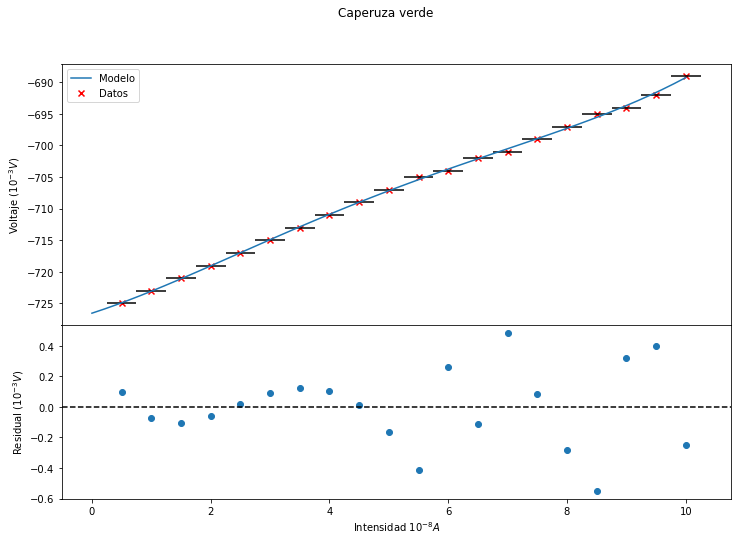

In [33]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)

fig.suptitle('Caperuza verde')
axs[0].scatter(intensidades,(-1)*voltajes_verde,label='Datos',color='r',marker='x')
axs[0].errorbar(intensidades,(-1)*voltajes_verde, xerr= error_x, fmt='none', ecolor='black')
axs[0].plot(_x_verde,(-1)*_y_verde,label='Modelo')
axs[0].set_ylabel('Voltaje ($10^{-3}V$)')
axs[0].legend()

axs[1].scatter(intensidades,r)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('Intensidad $10^{-8}A$')
axs[1].set_ylabel('Residual ($10^{-3}V$)')
#axs[1].set_ylim(-1.7,1.7)
#axs[1].set_yticks(np.arange(-1.5, 2., 0.5))
plt.show()

Azúl

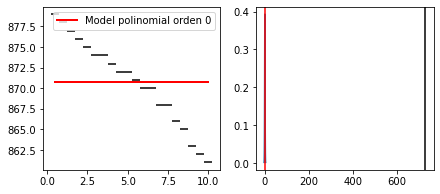

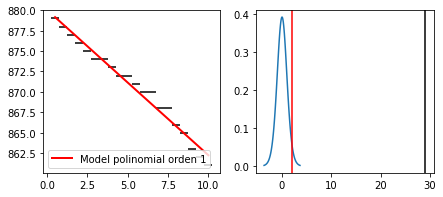

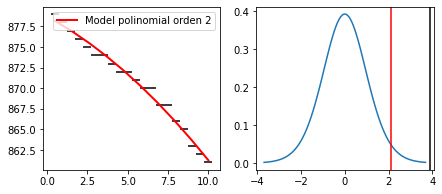

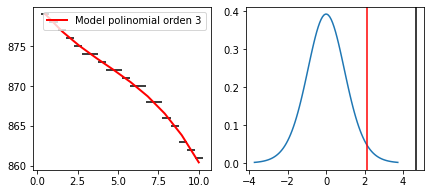

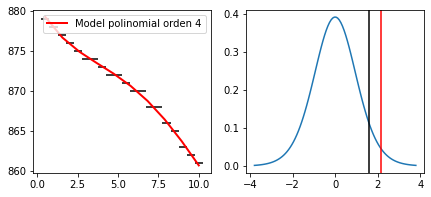

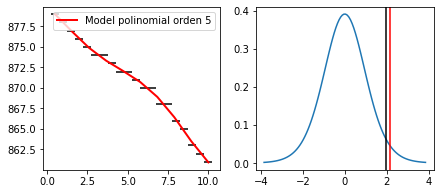

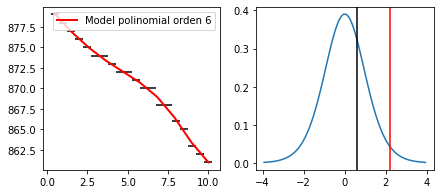

In [34]:
for n in range(7):
    
    param = Minimos_cuadrados(intensidades,voltajes_azul,n)
    Cov,R2,r = GetError(intensidades,voltajes_azul,param,n)
    #print(param)
    _x = np.linspace(np.min(intensidades),np.max(intensidades),10)
    _y = GetModel(_x,param)
    
    ai = param[-1]
    sigmaai = np.sqrt(Cov[-1,-1])
    
    tobs = np.abs(0. - ai)/sigmaai
    
    df = len(intensidades) - len(param) - 1
    #print(df)
    
    tcritico = t.ppf(0.975,df=df)
    tcritico

    #print(ai,sigmaai,tobs,tcritico)
    
    fig = plt.figure(figsize=(7,3))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    
    ax.errorbar(intensidades,voltajes_azul, xerr= error_x, fmt='none', ecolor='black')
    ax.plot(_x,_y,color='r',lw=2,label='Model polinomial orden {}'.format(n))
    ax.legend()
    
    _t = np.linspace(t.ppf(0.001,df=df),t.ppf(0.999,df=df),100)
    ax1.plot(_t,t.pdf(_t,df=df))
    ax1.axvline(x=tobs,color='k')
    ax1.axvline(x=tcritico,color='r')

In [35]:
# El mejor modelo es el polinomio de grado 3
n=3
param = Minimos_cuadrados(intensidades,voltajes_azul,n)
param

array([ 8.80192776e+02, -2.56225680e+00,  2.81425489e-01, -2.22660037e-02])

In [36]:
param_ = param[::-1]
param_

array([-2.22660037e-02,  2.81425489e-01, -2.56225680e+00,  8.80192776e+02])

In [37]:
Cov,R2,r = GetError(intensidades,voltajes_azul,param,n)

In [38]:
deltas = Get_sigma(Cov)
deltas

array([0.00476419, 0.07598053, 0.3477447 , 0.43212811])

In [39]:
# Voltaje de frenado:
Vf_azul = param_[-1]*1e-03
Vf.append(Vf_azul)
Vf_azul

0.88019277605779

In [40]:
#Incertidumbre del voltaje de frenado:
dvf_azul = deltas[-1]*1e-03
dvf.append(dvf_azul)
dvf_azul

0.0004321281099297562

In [41]:
_x_azul = np.linspace(0.,np.max(intensidades),50)
_y_azul = GetModel(_x_azul,param)

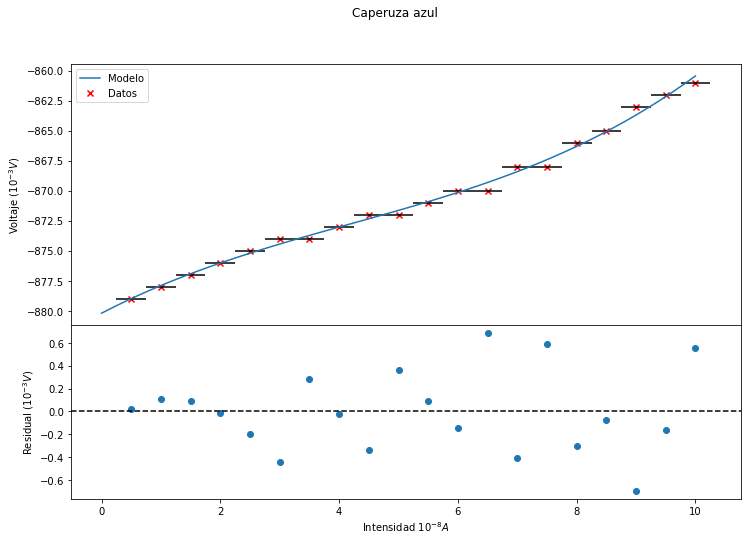

In [42]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)

fig.suptitle('Caperuza azul')
axs[0].scatter(intensidades,(-1)*voltajes_azul,label='Datos',color='r',marker='x')
axs[0].errorbar(intensidades,(-1)*voltajes_azul, xerr= error_x, fmt='none', ecolor='black')
axs[0].plot(_x_azul,(-1)*_y_azul,label='Modelo')
axs[0].set_ylabel('Voltaje ($10^{-3}V$)')
axs[0].legend()

axs[1].scatter(intensidades,r)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('Intensidad $10^{-8}A$')
axs[1].set_ylabel('Residual ($10^{-3}V$)')
#axs[1].set_ylim(-1.7,1.7)
#axs[1].set_yticks(np.arange(-1.5, 2., 0.5))
plt.show()

Rojo x10^-9

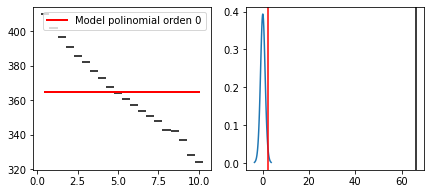

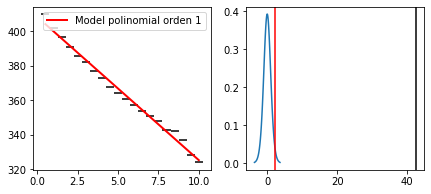

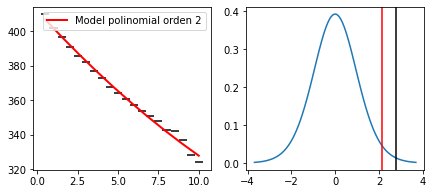

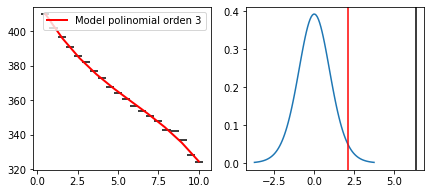

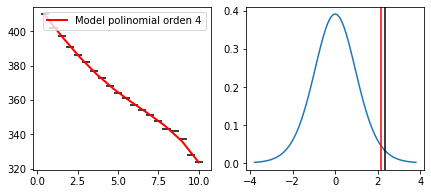

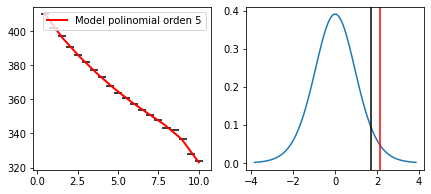

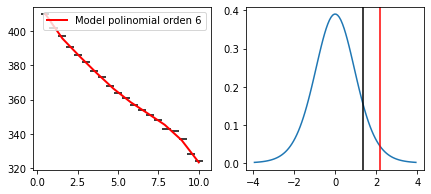

In [43]:
for n in range(7):
    
    param = Minimos_cuadrados(intensidades,voltajes_rojo_x9,n)
    Cov,R2,r = GetError(intensidades,voltajes_rojo_x9,param,n)
    #print(param)
    _x = np.linspace(np.min(intensidades),np.max(intensidades),10)
    _y = GetModel(_x,param)
    
    ai = param[-1]
    sigmaai = np.sqrt(Cov[-1,-1])
    
    tobs = np.abs(0. - ai)/sigmaai
    
    df = len(intensidades) - len(param) - 1
    #print(df)
    
    tcritico = t.ppf(0.975,df=df)
    tcritico

    #print(ai,sigmaai,tobs,tcritico)
    
    fig = plt.figure(figsize=(7,3))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    
    ax.errorbar(intensidades,voltajes_rojo_x9, xerr= error_x, fmt='none', ecolor='black')
    ax.plot(_x,_y,color='r',lw=2,label='Model polinomial orden {}'.format(n))
    ax.legend()
    
    _t = np.linspace(t.ppf(0.001,df=df),t.ppf(0.999,df=df),100)
    ax1.plot(_t,t.pdf(_t,df=df))
    ax1.axvline(x=tobs,color='k')
    ax1.axvline(x=tcritico,color='r')

In [44]:
# El mejor modelo es el polinomio de grado 4
n=4
param = Minimos_cuadrados(intensidades,voltajes_rojo_x9,n)
param

array([ 4.15080753e+02, -1.20428463e+01, -1.29021912e-01,  1.62084569e-01,
       -1.20229078e-02])

In [45]:
param_ = param[::-1]
param_

array([-1.20229078e-02,  1.62084569e-01, -1.29021912e-01, -1.20428463e+01,
        4.15080753e+02])

In [46]:
Cov,R2,r = GetError(intensidades,voltajes_rojo_x9,param,n)

In [47]:
deltas = Get_sigma(Cov)
deltas

array([0.00508867, 0.10759807, 0.76054388, 2.03157108, 1.62513835])

In [48]:
# Voltaje de frenado:
param_[-1]*1e-03

0.41508075335400646

In [49]:
#Incertidumbre del voltaje de frenado:
deltas[-1]*1e-03

0.0016251383527371402

In [50]:
_x = np.linspace(0.,np.max(intensidades),50)
_y = GetModel(_x,param)

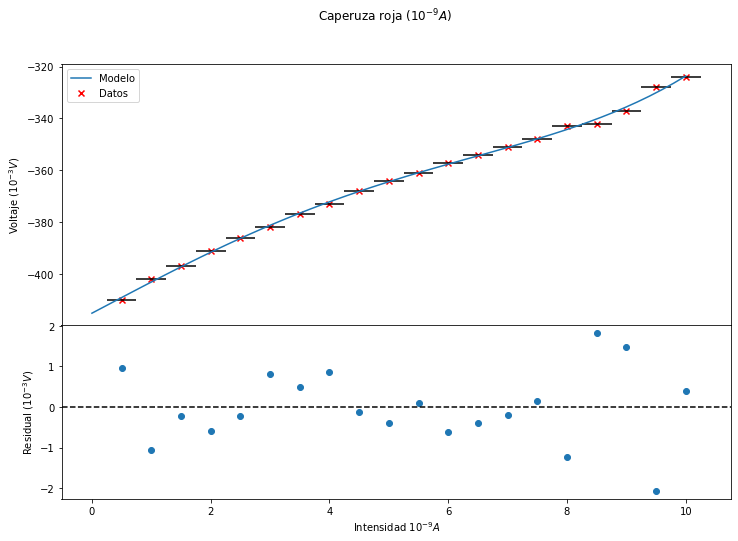

In [51]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)

fig.suptitle('Caperuza roja ($10^{-9}A$)')
axs[0].scatter(intensidades,(-1)*voltajes_rojo_x9,label='Datos',color='r',marker='x')
axs[0].errorbar(intensidades,(-1)*voltajes_rojo_x9, xerr= error_x, fmt='none', ecolor='black')
axs[0].plot(_x,(-1)*_y,label='Modelo')
axs[0].set_ylabel('Voltaje ($10^{-3}V$)')
axs[0].legend()

axs[1].scatter(intensidades,r)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('Intensidad $10^{-9}A$')
axs[1].set_ylabel('Residual ($10^{-3}V$)')
#axs[1].set_ylim(-1.7,1.7)
#axs[1].set_yticks(np.arange(-1.5, 2., 0.5))
plt.show()

Todos juntos:

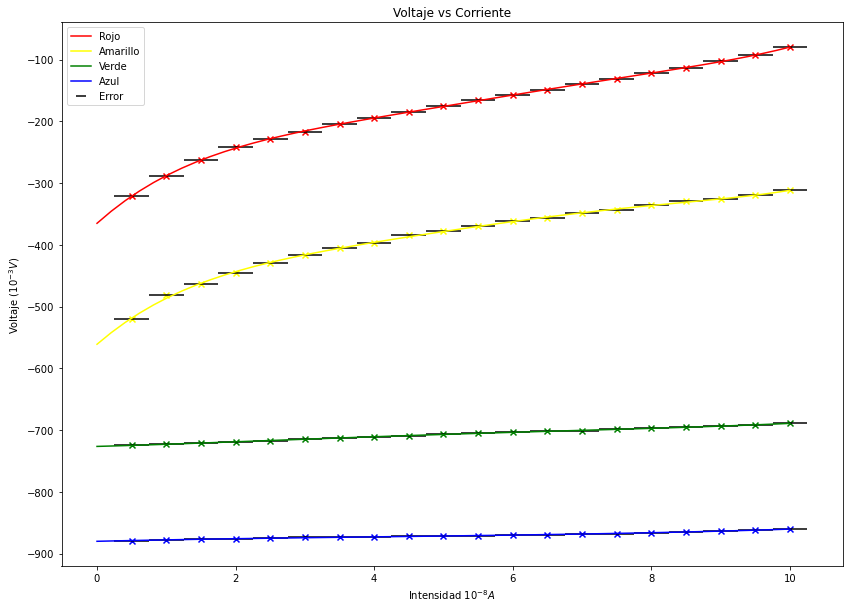

In [52]:
plt.figure(figsize=(14, 10))
plt.scatter(intensidades,(-1)*voltajes_rojo,color='r',marker='x')
plt.errorbar(intensidades,(-1)*voltajes_rojo, xerr= error_x, fmt='none', ecolor='black',label='Error')
plt.plot(_x_rojo,(-1)*_y_rojo,label='Rojo',color='r')

plt.scatter(intensidades,(-1)*voltajes_amarillo,color='yellow',marker='x')
plt.errorbar(intensidades,(-1)*voltajes_amarillo, xerr= error_x, fmt='none', ecolor='black')
plt.plot(_x_amarillo,(-1)*_y_amarillo,label='Amarillo',color='yellow')

plt.scatter(intensidades,(-1)*voltajes_verde,color='green',marker='x')
plt.errorbar(intensidades,(-1)*voltajes_verde, xerr= error_x, fmt='none', ecolor='black')
plt.plot(_x_verde,(-1)*_y_verde,label='Verde',color='green')

plt.scatter(intensidades,(-1)*voltajes_azul,color='blue',marker='x')
plt.errorbar(intensidades,(-1)*voltajes_azul, xerr= error_x, fmt='none', ecolor='black')
plt.plot(_x_azul,(-1)*_y_azul,label='Azul',color='blue')

plt.ylabel('Voltaje ($10^{-3}V$)')
plt.xlabel('Intensidad $10^{-8}A$')
plt.title('Voltaje vs Corriente')
plt.legend()
plt.show()

Constante de Planck y Función de trabajo.

In [53]:
Vf = np.array(Vf)
dvf = np.array(dvf)
e = 1 #carga del electón
lambda_max = np.array([659, 590, 567, 469]) #Las longitudes de onda de los picos o máximos de emisión de los LEDs
error_l_max = 30/(2*np.sqrt(2*np.log(2)))
c = 3*1e08*1e09 #c en nm
Vf

array([0.36525015, 0.56114809, 0.72654812, 0.88019278])

In [54]:
dvf

array([0.00158685, 0.00409305, 0.00045665, 0.00043213])

In [55]:
error_l_max

12.739827004320286

In [56]:
f = (c/lambda_max)*(10**(-14))
f

array([4.55235205, 5.08474576, 5.29100529, 6.39658849])

In [57]:
d_f = (1/lambda_max**2)*error_l_max
d_f

array([2.93354464e-05, 3.65981816e-05, 3.96275674e-05, 5.79185719e-05])

In [58]:
param = Minimos_cuadrados(f,Vf)
param_ = param[::-1]
param_

array([ 0.26931131, -0.80246038])

In [59]:
Cov,R2,r = GetError(f,Vf,param)
R2

0.9843794454769473

In [60]:
r

array([-0.05828937, -0.00577108,  0.10408092, -0.04002048])

In [61]:
deltas = Get_sigma(Cov)
deltas

array([0.06631187, 0.35631388])

In [62]:
error_y = np.sqrt((f*deltas[0])**2 + (param[1]*d_f)**2 + (deltas[1]**2))

In [63]:
_x = np.linspace(np.min(f),np.max(f),50)
_y = GetModel(_x,param)

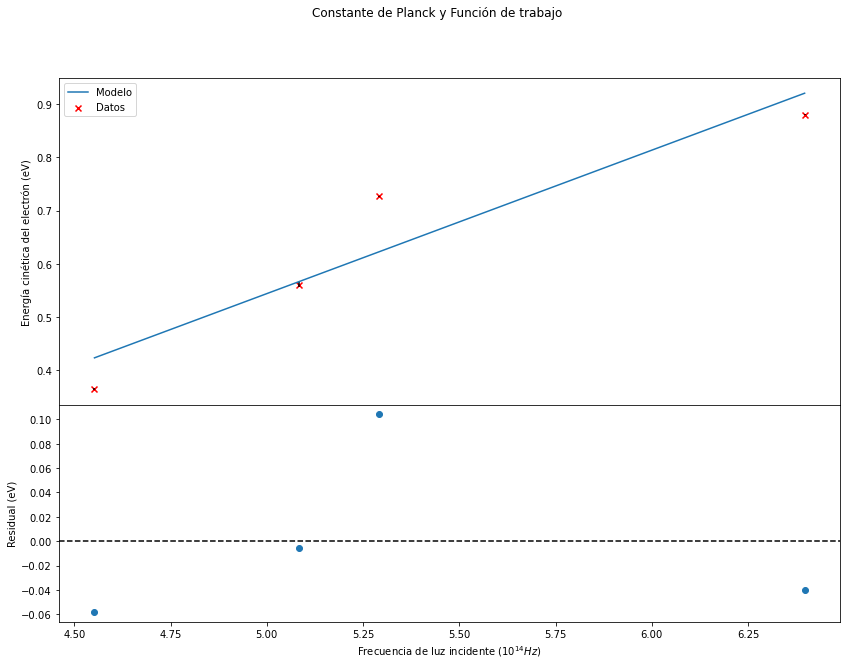

In [64]:
fig, axs = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)

fig.suptitle('Constante de Planck y Función de trabajo')
axs[0].scatter(f,Vf,label='Datos',color='r',marker='x')
axs[0].errorbar(f,Vf, xerr= d_f, yerr= dvf, fmt='none', ecolor='black')
axs[0].plot(_x,_y,label='Modelo')
axs[0].set_ylabel('Energía cinética del electrón (eV)')
axs[0].legend()

axs[1].scatter(f,r)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('Frecuencia de luz incidente ($10^{14}Hz$)')
axs[1].set_ylabel('Residual (eV)')
#axs[1].set_ylim(-1.7,1.7)
#axs[1].set_yticks(np.arange(-1.5, 2., 0.5))
plt.show()

In [65]:
#Constante de Planck
h_real = 4.135667696*1e-15
h_exp = param_[0]*1e-14
h_exp

2.6931131200821345e-15

In [66]:
Error_porcentual(h_real,h_exp)

0.3488081446468965

In [67]:
#Función de trabajo
phi_exp = param_[1]
phi_exp*(-1)

0.8024603828900962

In [68]:
np.abs(h_exp-h_real)

1.442554575917865e-15

In [69]:
2.5*deltas[0]*1e-14

1.6577966292319588e-15

In [70]:
presicion(deltas[0]*1e-14,h_exp)

(0.24622755232522864, False)

In [71]:
exactitud(h_real,h_exp,deltas[0]*1e-14)

(1.442554575917865e-15, True)